In [279]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt

In [308]:
def fun (list,name):  # 광고 or 비어있는칸 임의값 할당
    n=0
    for j in list:
        if j == name:
            return n
        n = n+1
    return print('에러'+name)

def fun2 (list, new_list) :  # 광고 리스트 요소 제거
    i=0
    while( i < len(list)):
      if '.' in list[i][0]:
        new_list.append(multi_page_result[i])
      i=i+1

def fun3 (list, new_list) :  # 리뷰개수 숫자만 받아오기
      i=0
      while i < len(list) :
          if list[i][0]=='이':
              list[i] = '0건'
    
          new_list.append(list[i].split('건')[0])
          i = i+1
      i = 0
      while i < len(list):
          if ',' in new_list[i] :
            new_list[i]=new_list[i].replace(',','')
          i = i+1  

def fun4 (list, new_list) :  # 인덱스 가져오기
    i = 0
    while i < len(list) :
        if list[i][0].split('.')[0] =='L':  # L.A일경우를 빼줌
            continue
        new_list.append(list[i][0].split('.')[0])
        i = i+1  
        
def Gradient_descent (X,Y) :
    X = X/1000
    Y = Y
    w=0
    b=0
    Irate = 0.01
    epochs = 10000
    n = float(len(X))

    for i in range(epochs):
        y_pred = w*X+b
        dw = (2/n) * sum(x*(y_pred-Y))
        db = (2/n) * sum(y_pred-Y)
        w = w -Irate * dw
        b = b - Irate * db
    print("w =",w,"b =", b)

    y_pred = w*X + b

    plt.scatter(X, Y)

    #plt.plot([min(X), max(X)], [min(y_pred), max(y_pred)], color = 'red')
    plt.plot(X, y_pred, color = 'red')
    plt.show()   

In [281]:
multi_page_result = list()

# 2페이지 부터 10페이지까지 크롤링
for i in range(1,10) :
  num = i*30  
  url = "https://www.tripadvisor.co.kr/Restaurants-g294197-oa"+str(num)+"-Seoul.html"

  html = requests.get(url) ##requests 를 이용해서 url의 html 파일을 가져옴
  soup = BeautifulSoup(html.text, "html.parser") ##가져온 html 파일을 html parser를 통해서 정리

  title_list = list() # 음식점 이름 크롤링
  html_review_list = soup.findAll("a", attrs={"class":"_15_ydu6b"})
  for line in html_review_list:
    text = line.get_text()
    text = text.replace("\n", "").strip()
    title_list.append(text)  
  
  keyword_list = list()
  reviewN_list = list()
  html_review_list = soup.findAll("span", attrs={"class":"_1p0FLy4t"})
  for line in html_review_list:
    text = line.get_text()
    if ' 리뷰' in text:
      reviewN_list.append(text)
    if '요리' in text:
      keyword_list.append(text)  
    elif '바' in text:
      keyword_list.append(text)
    elif '한국' in text:
      keyword_list.append(text) 
    elif '푸드' in text:
      keyword_list.append(text)
    elif '카페' in text:
      keyword_list.append(text)
    elif '인터' in text:
      keyword_list.append(text)
    elif '퓨전' in text:
      keyword_list.append(text)
    elif '스테' in text:
      keyword_list.append(text)

  html_review_list = soup.findAll("span", attrs={"_1jcHBWVU"})   
  label_list = list()
  for line in html_review_list:
    label = line.attrs["class"][1]
    if label == '_2vB__cbb':
        label =50
    elif label == '_1RZqMyqR':
        label = 45
    elif label == '_1-HtLqs3':
        label = 40
    elif label == '_2n4wJlqY':
        label = 35
    label_list.append(label) 
    
  if i == 1:  
    keyword_list.insert(fun(title_list, '59. 미분당 신촌점'), 'x')
    keyword_list.insert(fun(title_list, '60. 아구랑 꽃게랑'), 'x')
  elif i == 3:
    keyword_list.insert(fun(title_list, '97. 키친485'), 'x')
    keyword_list.insert(fun(title_list, '112. 손가네 닭한마리'), 'x')

  elif i == 4:
    keyword_list.insert(fun(title_list, '128. 모보 바'), 'x')
    #keyword_list.insert(8, 'x') #모보 바
  elif i == 5:
    keyword_list.insert(fun(title_list, '161. 황곱'), 'x')
  elif i == 6:
    keyword_list.insert(fun(title_list, '186. 호봉토스트'), 'x')
    keyword_list.insert(fun(title_list, '193. 치킨앤카레군 - 홍대점'), 'x')
    keyword_list.insert(fun(title_list, '197. 명동 영양 죽'), 'x')
  elif i == 7:
    keyword_list.insert(fun(title_list, '213. 버거뱅'), 'x')
    keyword_list.insert(fun(title_list, '220. 코코브루니'), 'x')
    keyword_list.insert(fun(title_list, '236. 소이연남'), 'x')
    keyword_list.insert(fun(title_list, '237. 김밥천국'), 'x')
    
  elif i == 8: 
    keyword_list.insert(fun(title_list, '245. 진주회관'), 'x') 
    keyword_list.insert(fun(title_list, '267. 임피리얼팰리스 패밀리아'), 'x') 
  elif i == 9:
    keyword_list.insert(fun(title_list, '276. 온더보더 타임스퀘어점'), 'x') 
    keyword_list.insert(fun(title_list, '282. 교대이층집'), 'x')   
    
  #label_list.insert(fun(title_list, '제이엘 디저트바'), 'x') # 광고가 뜨면 삭제 

  reviewN_list2 = list()
  fun3(reviewN_list, reviewN_list2)

  for title, keyword, label,review in zip(title_list, keyword_list,label_list, reviewN_list2):
    row_data = [title, keyword, label, review]
    multi_page_result.append(row_data)


In [282]:
restaurant_list = list()
fun2(multi_page_result, restaurant_list)

restaurant = np.array(restaurant_list)
df = pd.DataFrame(restaurant)
df.columns = ['title', 'keyword','score', 'review_n']
df['review_int'] = pd.to_numeric(df['review_n'])
df.to_csv("seoul_data.csv", mode='w', encoding='utf-8-sig')

In [283]:
newnew_list = list()
fun4(restaurant_list, newnew_list)

add_df = pd.DataFrame(newnew_list)
add_df.columns = ['index']
add_df['index_int'] = pd.to_numeric(add_df['index'])

new_df = pd.concat([df, add_df] , axis = 1)
new_df.to_csv("seoul_data.csv", mode='w', encoding='utf-8-sig')

display(new_df)


,title,keyword,score,review_n,review_int,index,index_int
0,31. 뉴델리,"인도 요리, 아시아 요리",45,99,99,31,31
1,32. 밍글스,"아시아 요리, 한국",45,175,175,32,32
2,33. 바이킹스워프 롯데월드몰점,"미국 요리, 시푸드",45,215,215,33,33
3,34. 진 원조 보신 닭한마리 본점,"아시아 요리, 한국",45,140,140,34,34
4,35. 미가본,"아시아 요리, 한국",40,647,647,35,35
...,...,...,...,...,...,...,...
265,296. 명동칼국수,"아시아 요리, 한국",40,47,47,296,296
266,297. 필동면옥,"아시아 요리, 한국",45,42,42,297,297
267,298. 투뿔 등심 이태원점,"바베큐, 아시아 요리",40,47,47,298,298
268,299. 붓처스컷,스테이크하우스,40,71,71,299,299


w = -790.3708479463781 b = 238.85822718697673


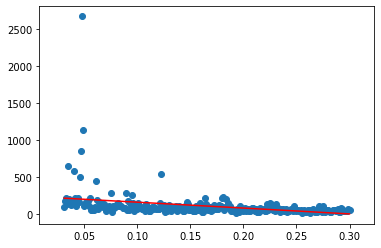

In [284]:
x = new_df.loc[:,'index_int']
y = new_df.loc[:,'review_int']
Gradient_descent(x, y)

[171.  15.  21.  63.]


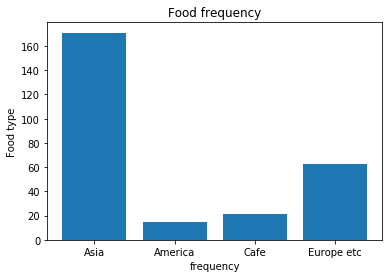

In [285]:
z = new_df.loc[:,'keyword']
a = np.zeros((4)) # 0 = 아시아 1 = 아메리카 2 = 카페 3 = 유럽 외
for i in z:
    if '한국' in i:
        a[0] = a[0] +1
    elif '일본' in i:
        a[0] = a[0] + 1
    elif '중' in i:
        a[0] = a[0]+1
    elif '아시아' in i:
        a[0] = a[0] +1
    elif '미국' in i:
        a[1] = a[1] + 1
    elif '멕시코' in i:
        a[1] = a[1] + 1
    elif '캐나다' in i:
        print('캐나다')
        a[1] = a[1] + 1
    elif '바' in i:
        a[2] = a[2]+1
    elif '카페' in i:
        a[2] = a[2]+1
    else :
        a[3] = a[3] + 1
print(a)
a_df =  pd.DataFrame(a)
a_name = ('Asia', 'America', 'Cafe', 'Europe etc')

plt.bar(range(len(a)), a, tick_label = a_name)
plt.title('Food frequency')
plt.xlabel('frequency')
plt.ylabel('Food type')

plt.show()

In [312]:
multi_page_result = list()

for i in range(1,6) :
  num = i*30  
  url = "https://www.tripadvisor.co.kr/Restaurants-g187323-oa"+str(num)+"-Berlin.html"

  html = requests.get(url) ##requests 를 이용해서 url의 html 파일을 가져옴
  soup = BeautifulSoup(html.text, "html.parser") ##가져온 html 파일을 html parser를 통해서 정리

  title_list = list() # 음식점 이름 크롤링
  html_review_list = soup.findAll("a", attrs={"class":"_15_ydu6b"})
  for line in html_review_list:
    text = line.get_text()
    text = text.replace("\n", "").strip()
    title_list.append(text)
#  print(title_list, len(title_list))
#  print(len(title_list))    
  
  keyword_list = list()
  reviewN_list = list()
  html_review_list = soup.findAll("span", attrs={"class":"_1p0FLy4t"})
  for line in html_review_list:
    text = line.get_text()
    if ' 리뷰' in text:
      reviewN_list.append(text)

    if '요리' in text:
      keyword_list.append(text)  
    elif '바' in text:
      keyword_list.append(text)
    elif '한국' in text:
      keyword_list.append(text) 
    elif '푸드' in text:
      keyword_list.append(text)
    elif '카페' in text:
      keyword_list.append(text)
    elif '인터' in text:
      keyword_list.append(text)
    elif '퓨전' in text:
      keyword_list.append(text)
    elif '스테' in text:
      keyword_list.append(text)
    elif '시안' in text:
      keyword_list.append(text)
    elif '이스' in text:
      keyword_list.append(text)
    elif '건강' in text:
      keyword_list.append(text)
#  print(keyword_list) 
#  print (len(keyword_list))

  html_review_list = soup.findAll("span", attrs={"_1jcHBWVU"})   
  label_list = list()
  for line in html_review_list:
    label = line.attrs["class"][1]
    if label == '_2vB__cbb':
        label =50
    elif label == '_1RZqMyqR':
        label = 45
    elif label == '_1-HtLqs3':
        label = 40
    elif label == '_2n4wJlqY':
        label = 35
    label_list.append(label) 
    
  if i == 4:
    keyword_list.insert(fun(title_list, '136. Ga Ya Ya'), 'x')

  reviewN_list2 = list()
  fun3(reviewN_list, reviewN_list2)

  for title, keyword, label,review in zip(title_list, keyword_list,label_list, reviewN_list2):
    row_data = [title, keyword, label, review]
    multi_page_result.append(row_data)


In [313]:
restaurant_list = list()
fun2(multi_page_result, restaurant_list)

restaurant = np.array(restaurant_list)
df = pd.DataFrame(restaurant)
df.columns = ['title', 'keyword','score', 'review_n']
df['review_int'] = pd.to_numeric(df['review_n'])

In [314]:
newnew_list = list()
fun4(restaurant_list, newnew_list)

add_df = pd.DataFrame(newnew_list)
add_df.columns = ['index']
add_df['index_int'] = pd.to_numeric(add_df['index'])

new_df = pd.concat([df, add_df] , axis = 1)
new_df.to_csv("Berlin_data.csv", mode='w', encoding='utf-8-sig')
display(new_df)

,title,keyword,score,review_n,review_int,index,index_int
0,31. Vedang - plant burger (Mall of Berlin),"미국 요리, 패스트푸드",50,497,497,31,31
1,32. Fes - Turkish BBQ,"터키, 지중해 요리",45,360,360,32,32
2,33. Ristorante & Vinobar CaliBocca,이탈리아 요리,45,304,304,33,33
3,34. Haveli,"인도 요리, 아시아 요리",45,1284,1284,34,34
4,35. Tor189,"인터내셔널, 유럽 요리",50,118,118,35,35
...,...,...,...,...,...,...,...
143,176. Ousies,"지중해 요리, 유럽 요리",45,225,225,176,176
144,177. BLOCK HOUSE Friedrichstraße,"미국 요리, 스테이크하우스",40,1790,1790,177,177
145,178. Thai Inside,"아시아 요리, 타이 요리",45,891,891,178,178
146,179. KOPPS,건강식,40,576,576,179,179


w = 1096.3890000688934 b = 497.8371466547883


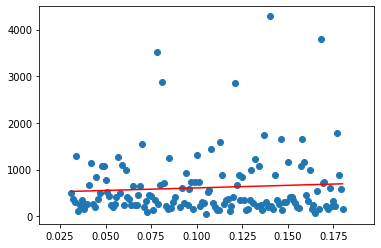

In [315]:
x = new_df.loc[:,'index_int']
y = new_df.loc[:,'review_int']
Gradient_descent(x, y)

[60.  7.  9. 72.]


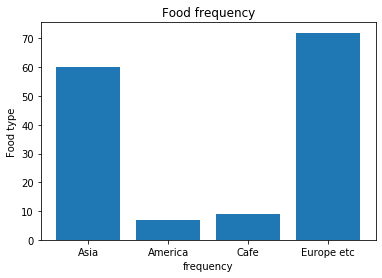

In [316]:
z = new_df.loc[:,'keyword']
a = np.zeros((4)) # 0 = 아시아 1 = 아메리카 2 = 카페 3 = 유럽 외
for i in z:
    if '한국' in i:
        a[0] = a[0] +1
    elif '일본' in i:
        a[0] = a[0] + 1
    elif '중' in i:
        a[0] = a[0]+1
    elif '아시아' in i:
        a[0] = a[0] +1
    elif '미국' in i:
        a[1] = a[1] + 1
    elif '멕시코' in i:
        a[1] = a[1] + 1
    elif '캐나다' in i:
        print('캐나다')
        a[1] = a[1] + 1
    elif '바' in i:
        a[2] = a[2]+1
    elif '카페' in i:
        a[2] = a[2]+1
    else :
        a[3] = a[3] + 1
print(a)
a_df =  pd.DataFrame(a)
a_name = ('Asia', 'America', 'Cafe', 'Europe etc')


plt.bar(range(len(a)), a, tick_label = a_name)
plt.title('Food frequency')
plt.xlabel('frequency')
plt.ylabel('Food type')

plt.show()

In [293]:
multi_page_result = list()

for i in range(1,6) :
  num = i*30  
  url = "https://www.tripadvisor.co.kr/Restaurants-g308272-oa"+str(num)+"-Shanghai.html"

  html = requests.get(url) ##requests 를 이용해서 url의 html 파일을 가져옴
  soup = BeautifulSoup(html.text, "html.parser") ##가져온 html 파일을 html parser를 통해서 정리

  title_list = list() # 음식점 이름 크롤링
  html_review_list = soup.findAll("a", attrs={"class":"_15_ydu6b"})
  for line in html_review_list:
    text = line.get_text()
    text = text.replace("\n", "").strip()
    title_list.append(text)
#  print(title_list, len(title_list))
#  print(len(title_list))    
  
  keyword_list = list()
  reviewN_list = list()
  html_review_list = soup.findAll("span", attrs={"class":"_1p0FLy4t"})
  for line in html_review_list:
    text = line.get_text()
    if ' 리뷰' in text:
      reviewN_list.append(text)

    if '요리' in text:
      keyword_list.append(text)  
    elif '바' in text:
      keyword_list.append(text)
    elif '한국' in text:
      keyword_list.append(text) 
    elif '푸드' in text:
      keyword_list.append(text)
    elif '카페' in text:
      keyword_list.append(text)
    elif '인터' in text:
      keyword_list.append(text)
    elif '퓨전' in text:
      keyword_list.append(text)
    elif '스테' in text:
      keyword_list.append(text)
    elif '건강' in text:
      keyword_list.append(text)
    elif '페루' in text:
      keyword_list.append(text)
#  print(keyword_list) 
#  print (len(keyword_list))

  html_review_list = soup.findAll("span", attrs={"_1jcHBWVU"})   
  label_list = list()
  for line in html_review_list:
    label = line.attrs["class"][1]
    if label == '_2vB__cbb':
        label =50
    elif label == '_1RZqMyqR':
        label = 45
    elif label == '_1-HtLqs3':
        label = 40
    elif label == '_2n4wJlqY':
        label = 35
    label_list.append(label)   
    
  if i == 1:  
    keyword_list.insert(fun(title_list, '38. Host Wine & Kitchen'), 'x')
    keyword_list.insert(fun(title_list, '39. Cucina'), 'x')
    keyword_list.insert(fun(title_list, '53. Pelham\'s at Bund 2 at Waldorf Astoria Shanghai on the Bund'), 'x')
    keyword_list.insert(fun(title_list, '54. El Willy'), 'x')   
  elif i == 2:
    keyword_list.insert(fun(title_list, '72. Lunette By Amanda'), 'x')
  elif i == 4:
    keyword_list.insert(fun(title_list, '133. Fenghui Tang-styled Teahouse'), 'x')
    keyword_list.insert(fun(title_list, '150. Sir Elly\'s Restaurant'), 'x')
  elif i ==5:
    keyword_list.insert(fun(title_list, '177. Pistolera Mexican Cantina (Jinqiao)'), 'x')
    
#  label_list.insert(fun(title_list, '알로이 타이레스토랑'), 'x') # 광고 점수 삭제

  reviewN_list2 = list()
  fun3(reviewN_list, reviewN_list2)

  for title, keyword, label,review in zip(title_list, keyword_list,label_list, reviewN_list2):
    row_data = [title, keyword, label, review]
    multi_page_result.append(row_data)


In [294]:
restaurant_list = list()
fun2(multi_page_result, restaurant_list)

restaurant = np.array(restaurant_list)
df = pd.DataFrame(restaurant)
df.columns = ['title', 'keyword','score', 'review_n']
df['review_int'] = pd.to_numeric(df['review_n'])


In [295]:
newnew_list = list()
fun4(restaurant_list, newnew_list)

add_df = pd.DataFrame(newnew_list)
add_df.columns = ['index']
add_df['index_int'] = pd.to_numeric(add_df['index'])

new_df = pd.concat([df, add_df] , axis = 1)
new_df.to_csv("Shanghai_data.csv", mode='w', encoding='utf-8-sig')

display(new_df)


,title,keyword,score,review_n,review_int,index,index_int
0,31. Urban Thai,"아시아 요리, 타이 요리",45,161,161,31,31
1,32. Shanghai Haidilao Hot Pot (Zhangyang Road),"중국 요리, 아시아 요리",45,420,420,32,32
2,33. Din Tai Fung (Nanjing West Road),"중국 요리, 아시아 요리",45,627,627,33,33
3,34. Palatino Roman Cuisine,"이탈리아 요리, 피자",45,224,224,34,34
4,"35. Lobby Lounge, Pudong Shangri-La","중국 요리, 카페",45,124,124,35,35
...,...,...,...,...,...,...,...
145,176. The Flying Fox Irish Bistro,"바, 아일랜드 요리",40,118,118,176,176
146,177. Pistolera Mexican Cantina (Jinqiao),x,40,179,179,177,177
147,178. Sense 8 Cantonese Cuisine,"중국 요리, 아시아 요리",45,47,47,178,178
148,179. Mr Willis,"유럽 요리, 인터내셔널",40,143,143,179,179


w = -3233.8272812041687 b = 593.3087781669024


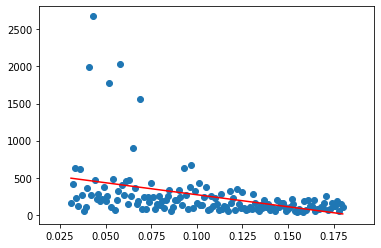

In [296]:
x = new_df.loc[:,'index_int']
y = new_df.loc[:,'review_int']
Gradient_descent(x, y)

[69.  9. 20. 52.]


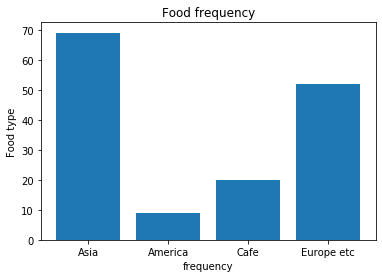

In [297]:
z = new_df.loc[:,'keyword']
a = np.zeros((4)) # 0 = 아시아 1 = 아메리카 2 = 카페 3 = 유럽 외
for i in z:
    if '한국' in i:
        a[0] = a[0] +1
    elif '일본' in i:
        a[0] = a[0] + 1
    elif '중' in i:
        a[0] = a[0]+1
    elif '아시아' in i:
        a[0] = a[0] +1
    elif '미국' in i:
        a[1] = a[1] + 1
    elif '멕시코' in i:
        a[1] = a[1] + 1
    elif '캐나다' in i:
        print('캐나다')
        a[1] = a[1] + 1
    elif '바' in i:
        a[2] = a[2]+1
    elif '카페' in i:
        a[2] = a[2]+1
    else :
        a[3] = a[3] + 1
print(a)
a_df =  pd.DataFrame(a)
a_name = ('Asia', 'America', 'Cafe', 'Europe etc')


plt.bar(range(len(a)), a, tick_label = a_name)
plt.title('Food frequency')
plt.xlabel('frequency')
plt.ylabel('Food type')

plt.show()

In [301]:
newnew_list = list()
fun4(restaurant_list, newnew_list)

L
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
